In [1]:
import random
import json
import matplotlib.pyplot as plt

In [2]:
# Rolls must not have two right-hand fingerings in a row.
# T -> Thumb
# 1 -> Index
# 2 -> Middle
# * -> Rest
fingerings = ["T", "1", "2", "*"]

rules = [
    lambda x: "TT" not in x,
    lambda x: "11" not in x,
    lambda x: "22" not in x,
    lambda x: "**" not in x,
    lambda x: x[0] != "*" 
]

# Random Roll Generator

This method was pair-programmed with Mike and Ricky - it randomly generates rolls with no guarantee of getting "all rolls". There are statistical guarantees to get them all, but it must be calculated by simulation.

In [3]:
def generate_roll(finger_list, roll_length=8):
    """
    Given a set of allowed fingers and a validator, randomly generate rolls
    of length `roll_length`.
    
    Args:
        roll_length: number of notes in a roll
        finger_list: the possible ways to strike a string
    """
    return "".join([random.choice(finger_list) for i in range(roll_length)])


In [4]:
def randomly_generate_rolls(num_trials, roll_generator_kwargs, rule_list):
    """This wraps the random roll generator so that we can generate a bunch of
    them all at once. No guarantee of getting 'em all!"""
    roll_counter = {}
    for trial in range(num_trials):
        roll_candidate = generate_roll(**roll_generator_kwargs)
        # Check roll against the rule list with a ternary operator.
        roll = roll_candidate if all(rule(roll_candidate) for rule in rule_list) else 'inval'
        if roll not in roll_counter:
            roll_counter[roll] = 1
        else:
            roll_counter[roll] += 1
    return roll_counter

This method exhaustively iterates through all possible combinations recursively.

In [5]:
def generate_all_rolls(finger_list, roll_length=8, rolls=[]):
    """
    We take a recurisve approach here, and leverage the fact that all rolls in the
    roll list are the same length each time the function is called.
    """
    if len(rolls) == 0:
        return generate_all_rolls(roll_length=roll_length, finger_list=finger_list, rolls=finger_list)
    elif len(rolls[0]) == roll_length:
        return rolls
    else:
        new_rolls = []
        for finger in finger_list:
            for roll in rolls:
                new_rolls.append(roll + finger)
    return generate_all_rolls(roll_length=roll_length, finger_list=finger_list, rolls=new_rolls)

In [6]:
randomly_generate_rolls(
    num_trials=100,
    roll_generator_kwargs=dict(roll_length=8, finger_list=["T", "1", "2"]),
    rule_list=rules
)

{'inval': 98, '21T212T2': 1, 'T1T21T1T': 1}

In [7]:
results = []
for i in range(100, 100000, 5000):
    print(f"Running trial {i}")
    results.append((
        i,
        randomly_generate_rolls(
            num_trials=i,
            roll_generator_kwargs=dict(
                roll_length=8,
                finger_list=["T", "1", "2"]
          ),
          rule_list=rules
      )
    ))

Running trial 100
Running trial 5100
Running trial 10100
Running trial 15100
Running trial 20100
Running trial 25100
Running trial 30100
Running trial 35100
Running trial 40100
Running trial 45100
Running trial 50100
Running trial 55100
Running trial 60100
Running trial 65100
Running trial 70100
Running trial 75100
Running trial 80100
Running trial 85100
Running trial 90100
Running trial 95100


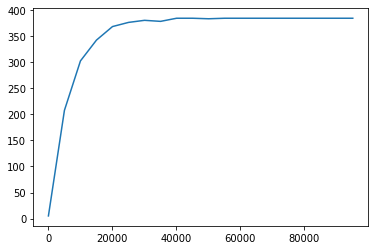

In [8]:
trials, num_discovered_rolls = zip(*[(result[0], len(result[1].keys())) for result in results])
plt.plot(trials, num_discovered_rolls)

It looks like we have to run around 50,000 to 60,000 trials to "guarantee" finding all the rolls, which in this case seems to be in the high 300s. However, we can exhaustively generate all rolls using recursion.

# Exhaustive Roll Generation

With this method, we use recursion to recurisvely find every possible roll of any length given a finger list.

In [9]:
# Generate all possible rolls, removing invalid rolls.
rolls = generate_all_rolls(finger_list=["T", "1", "2"], roll_length=8)
eight_rolls = list(filter(lambda x: all(rule(x) for rule in rules), rolls))

rolls = generate_all_rolls(finger_list=["T", "1", "2"], roll_length=4)
four_rolls = list(filter(lambda x: all(rule(x) for rule in rules), rolls))

Its **much** faster to recursively generate 8-note rolls.

In [10]:
print(len(eight_rolls))
print(eight_rolls)

384
['1T1T1T1T', '2T1T1T1T', 'T21T1T1T', '121T1T1T', '1T2T1T1T', '2T2T1T1T', 'T12T1T1T', '212T1T1T', 'T1T21T1T', '21T21T1T', 'T2T21T1T', '12T21T1T', '1T121T1T', '2T121T1T', 'T2121T1T', '12121T1T', '1T1T2T1T', '2T1T2T1T', 'T21T2T1T', '121T2T1T', '1T2T2T1T', '2T2T2T1T', 'T12T2T1T', '212T2T1T', 'T1T12T1T', '21T12T1T', 'T2T12T1T', '12T12T1T', '1T212T1T', '2T212T1T', 'T1212T1T', '21212T1T', 'T1T1T21T', '21T1T21T', 'T2T1T21T', '12T1T21T', '1T21T21T', '2T21T21T', 'T121T21T', '2121T21T', 'T1T2T21T', '21T2T21T', 'T2T2T21T', '12T2T21T', '1T12T21T', '2T12T21T', 'T212T21T', '1212T21T', '1T1T121T', '2T1T121T', 'T21T121T', '121T121T', '1T2T121T', '2T2T121T', 'T12T121T', '212T121T', 'T1T2121T', '21T2121T', 'T2T2121T', '12T2121T', '1T12121T', '2T12121T', 'T212121T', '1212121T', '1T1T1T2T', '2T1T1T2T', 'T21T1T2T', '121T1T2T', '1T2T1T2T', '2T2T1T2T', 'T12T1T2T', '212T1T2T', 'T1T21T2T', '21T21T2T', 'T2T21T2T', '12T21T2T', '1T121T2T', '2T121T2T', 'T2121T2T', '12121T2T', '1T1T2T2T', '2T1T2T2T', 'T21T2T2T',

In [11]:
print(len(four_rolls))
print(four_rolls)

24
['1T1T', '2T1T', 'T21T', '121T', '1T2T', '2T2T', 'T12T', '212T', 'T1T1', '21T1', 'T2T1', '12T1', '1T21', '2T21', 'T121', '2121', 'T1T2', '21T2', 'T2T2', '12T2', '1T12', '2T12', 'T212', '1212']


Do all four note rolls combine to all eight note rolls? We create all possible eight note rolls from pairs of four note rolls, then remove invalid rolls.

In [12]:
new_rolls = []
for roll_1 in four_rolls:
    for roll_2 in four_rolls:
        new_rolls.append(roll_1 + roll_2)

In [13]:
eight_from_four = list(filter(lambda x: all(rule(x) for rule in rules), new_rolls))

In [14]:
print(len(eight_from_four))
print(eight_from_four)

384
['1T1T1T1T', '1T1T2T1T', '1T1T121T', '1T1T1T2T', '1T1T2T2T', '1T1T212T', '1T1T21T1', '1T1T12T1', '1T1T1T21', '1T1T2T21', '1T1T2121', '1T1T21T2', '1T1T12T2', '1T1T1T12', '1T1T2T12', '1T1T1212', '2T1T1T1T', '2T1T2T1T', '2T1T121T', '2T1T1T2T', '2T1T2T2T', '2T1T212T', '2T1T21T1', '2T1T12T1', '2T1T1T21', '2T1T2T21', '2T1T2121', '2T1T21T2', '2T1T12T2', '2T1T1T12', '2T1T2T12', '2T1T1212', 'T21T1T1T', 'T21T2T1T', 'T21T121T', 'T21T1T2T', 'T21T2T2T', 'T21T212T', 'T21T21T1', 'T21T12T1', 'T21T1T21', 'T21T2T21', 'T21T2121', 'T21T21T2', 'T21T12T2', 'T21T1T12', 'T21T2T12', 'T21T1212', '121T1T1T', '121T2T1T', '121T121T', '121T1T2T', '121T2T2T', '121T212T', '121T21T1', '121T12T1', '121T1T21', '121T2T21', '121T2121', '121T21T2', '121T12T2', '121T1T12', '121T2T12', '121T1212', '1T2T1T1T', '1T2T2T1T', '1T2T121T', '1T2T1T2T', '1T2T2T2T', '1T2T212T', '1T2T21T1', '1T2T12T1', '1T2T1T21', '1T2T2T21', '1T2T2121', '1T2T21T2', '1T2T12T2', '1T2T1T12', '1T2T2T12', '1T2T1212', '2T2T1T1T', '2T2T2T1T', '2T2T121T',

YES! So, all eight-note rolls are composed of two four note rolls. So, we only have to learn TWENTY FOUR rolls. Lets look at them:

In [15]:
for roll in four_rolls:
    print(roll)

1T1T
2T1T
T21T
121T
1T2T
2T2T
T12T
212T
T1T1
21T1
T2T1
12T1
1T21
2T21
T121
2121
T1T2
21T2
T2T2
12T2
1T12
2T12
T212
1212
